## 实现多项式函数拟合

In [110]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from functools import reduce

In [102]:
# 创建输入训练变量x
x_train = np.arange(1,11)
print(x_train)
# 创建随机输出训练变量
y_train = 0.3*x_train+0.25*x_train+np.random.rand(10)
print(y_train)

# 创建输入测试变量x
x_test = np.arange(11,21)
print(x_test)
# 创建随机输出测试变量
y_test = 0.3*x_test+0.25*x_test+np.random.rand(10)
print(y_test)

[ 1  2  3  4  5  6  7  8  9 10]
[1.32899883 1.74789197 2.4614594  2.54351633 3.26210605 3.77136068
 4.00265226 5.16919122 5.84474471 6.46002708]
[11 12 13 14 15 16 17 18 19 20]
[ 6.64131552  6.91556832  7.73181114  8.53635709  9.0046381   8.89497685
 10.22271198 10.55258763 10.55657471 11.38126345]


[0.56534876 0.54977669]
 
0.5653 x + 0.5498


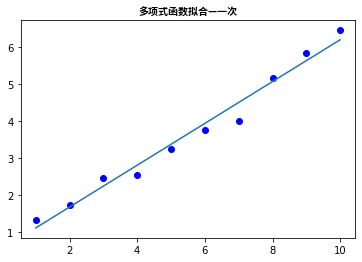

In [104]:
# 按一次多项式拟合
coef = np.polyfit(x_train, y_train, 1)     # 一次多项式系数
print(coef)
y1 = np.poly1d(coef)
print(y1)
# 绘图
zhfont1 = matplotlib.font_manager.FontProperties(fname="../1_数据分析/file/SourceHanSansSC-Bold.otf") 
plt.title("多项式函数拟合—一次", fontproperties=zhfont1)
plt.plot(x_train,y_train, 'ob')
plt.plot(x_train, y1(x_train))

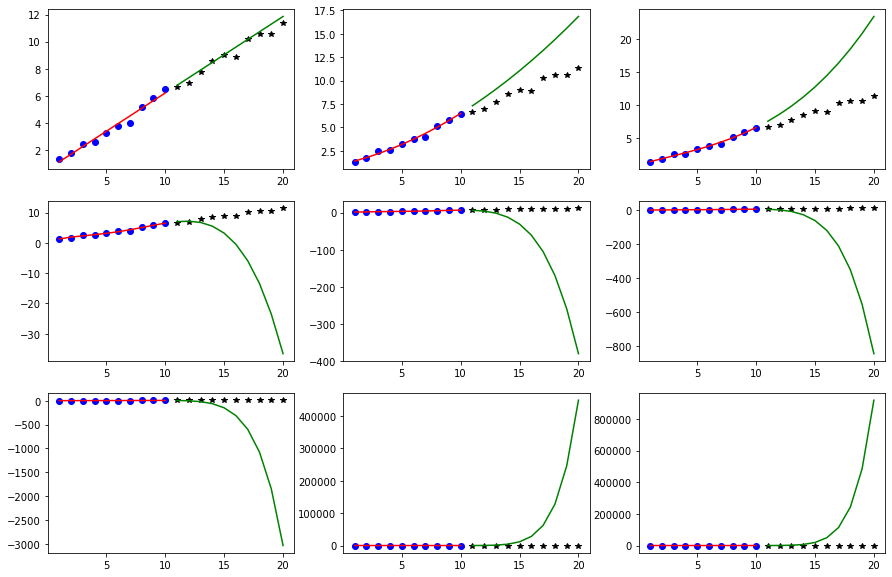

In [137]:
# 实现1-9次的多项式函数拟合
fig, ax1 = plt.subplots(figsize=(15, 10))
plt.subplot(3,3,3)
error_train = []
error_test = []
for n in range(1,10):
    coef = np.polyfit(x_train, y_train, n)    # 多项式函数系数
    func = eval("np.poly1d(" + "coef" + ")")    # 多项式函数方程
    yn_train = func(x_train)
    yn_test = func(x_test)
    plt.subplot(3,3,n)
    plt.plot(x_train,y_train, 'ob')
    plt.plot(x_test,y_test, '*k')
    plt.plot(x_train, yn_train, 'r')
    plt.plot(x_test, yn_test, 'g')
    
    # 平方误差函数(f(x)-y)**2, 训练误差：(∑(f(x)-y)**2)/N
    _error_train = reduce(lambda x,y: x+y, list(map(lambda x,y:(x-y)**2, y_train, yn_train)))/n
    error_train.append(_error_train)
    _error_test = reduce(lambda x,y: x+y, list(map(lambda x,y:(x-y)**2, y_test, yn_test)))/n
    error_test.append(_error_test)

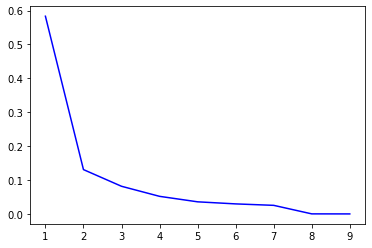

In [144]:
# 分析多项式系数和误差之间的关系
plt.plot(np.arange(1,10), error_train, 'b')

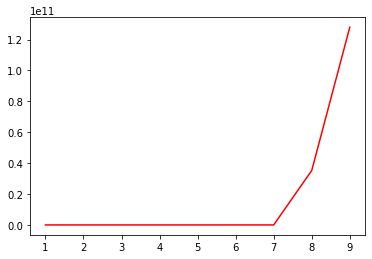

In [145]:
plt.plot(np.arange(1,10), error_test, 'r')